<a href="https://colab.research.google.com/github/jp2yt/AI-for-medicine/blob/main/AI_diabetis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading and showing input (features) and output data (desired output)

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/jp2yt/AI-for-medicine/main/diabetes.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Print the size of the dataframe

In [19]:
df.shape

(768, 9)

Print the dataframe

In [20]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Check the features and output variables name

In [21]:
features = list(df.columns)
type(features)

list

In [22]:
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Glucose vs. BMI colored by Diabetes Outcome

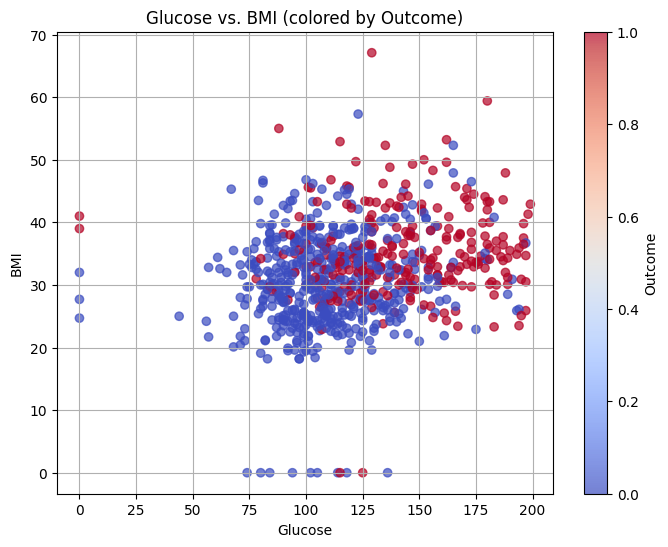

In [28]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='coolwarm', alpha=0.7)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs. BMI (colored by Outcome)')
plt.colorbar(scatter, label='Outcome')
plt.grid(True)
plt.show()

Age vs. Insulin with color showing Diabetes

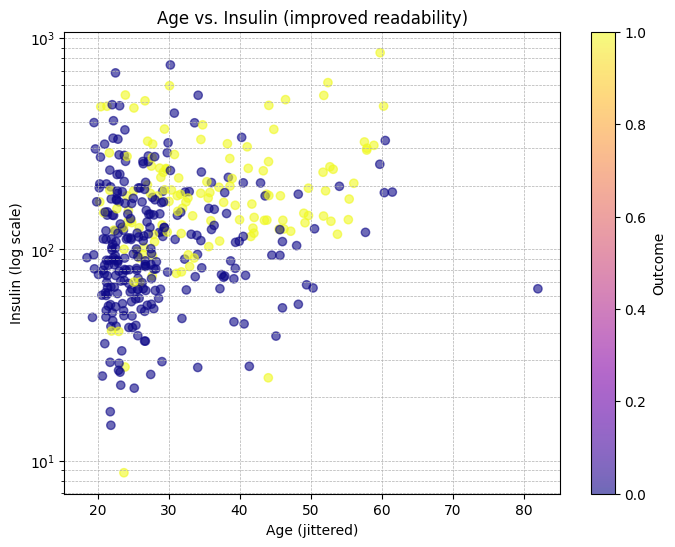

In [31]:
plt.figure(figsize=(8, 6))
# Add small jitter to points for better separation
jitter_age = df['Age'] + np.random.normal(0, 1, size=len(df))
jitter_insulin = df['Insulin'].replace(0, np.nan)  # ignore 0s (likely missing)
jitter_insulin = jitter_insulin + np.random.normal(1, 10, size=len(df))

scatter = plt.scatter(jitter_age, jitter_insulin, c=df['Outcome'], cmap='plasma', alpha=0.6)
plt.yscale('log')  # log scale for insulin
plt.xlabel('Age (jittered)')
plt.ylabel('Insulin (log scale)')
plt.title('Age vs. Insulin (improved readability)')
plt.colorbar(scatter, label='Outcome')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Pregnancies vs. Glucose

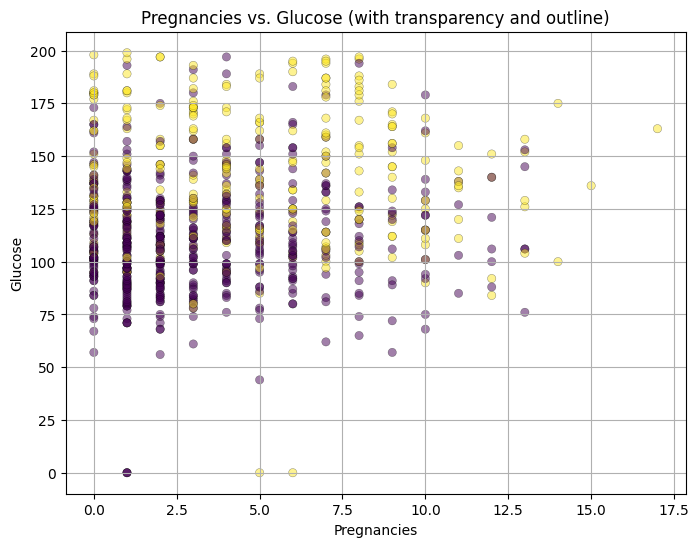

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Pregnancies'], df['Glucose'], c=df['Outcome'], cmap='viridis', alpha=0.5, edgecolors='k', linewidths=0.3)
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Pregnancies vs. Glucose (with transparency and outline)')
plt.grid(True)
plt.show()

In [33]:
print("Dataframe shape before NaN removal:", df.shape)


Dataframe shape before NaN removal: (768, 9)


Removing missing data

In [34]:
df.dropna(axis=0, how='any', inplace=True)
print("Dataframe shape after NaN removal:", df.shape)

Dataframe shape after NaN removal: (768, 9)


In [35]:
X = df.iloc[:,2::]
y = df['Age']
print (type(X))
print (type(y))
print (X.shape)
print (y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(768, 7)
(768,)


In [36]:
X.head(6)

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,72,35,0,33.6,0.627,50,1
1,66,29,0,26.6,0.351,31,0
2,64,0,0,23.3,0.672,32,1
3,66,23,94,28.1,0.167,21,0
4,40,35,168,43.1,2.288,33,1
5,74,0,0,25.6,0.201,30,0
